# Generation of observation from inhomogenous Poisson process

## Algorithm by Lewis and Shedler, 1979

In [1]:
import numpy as np
from Generator import LewisShedler

In [2]:
T = np.pi
n_size = 1000

In [3]:
def lam(t):
    return np.where(t < 1, n_size, n_size*(np.sin(t**2*np.pi)+1)/3)

In [4]:
generator = LewisShedler(lam, T, lambda_hat=n_size)

Maximum of the intensity function: 1000.0


In [5]:
%%timeit 
t = generator.generate()

515 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
t = generator.generate()
print('Number of simulated points: {}'.format(len(t)))

Number of simulated points: 1660


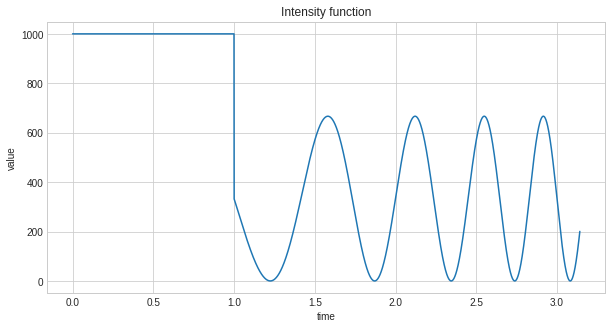

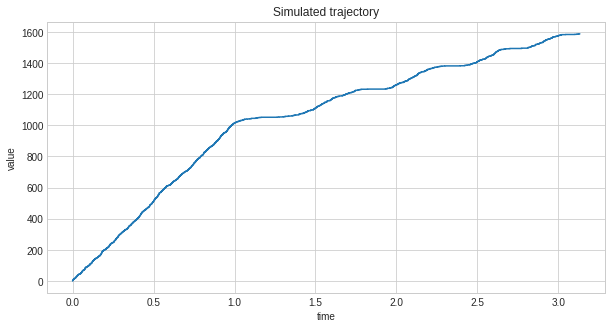

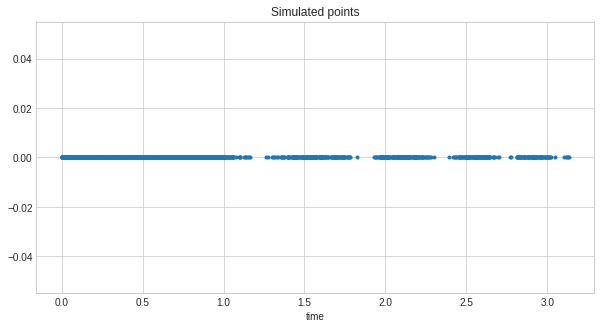

<Figure size 720x360 with 0 Axes>

In [7]:
generator.visualize(save=False)

# Approximation of integral operator

In [1]:
import numpy as np
from Operator import Operator

In [2]:
def kernel(x, y):
    return np.repeat(1, len(x))

In [3]:
operator = Operator(kernel, 0, 1, 500, "rectangle")

In [4]:
oper = operator.approximate()

Calculating operator approximation...
approximate ran in 0.08242058753967285 s


In [5]:
oper = operator.K
oper.shape

(500, 500)

# Estimation of intensity function using Landweber iteration

In [1]:
import numpy as np
from Generator import LewisShedler
from Estimators import Landweber

In [2]:
sample_size = 100

In [3]:
def kernel(x, y):
    return np.where(x < y, 1, 1)

In [4]:
def lam(t):
    return np.where(t<1, sample_size, sample_size)

Maximum of the intensity function: 100


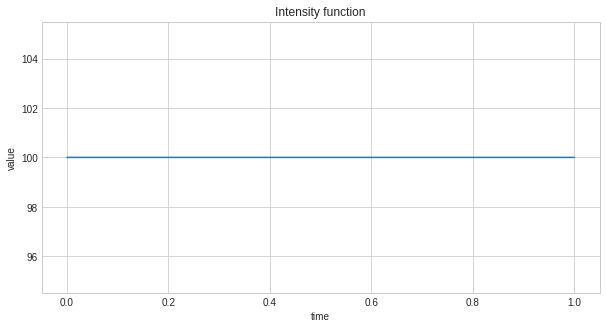

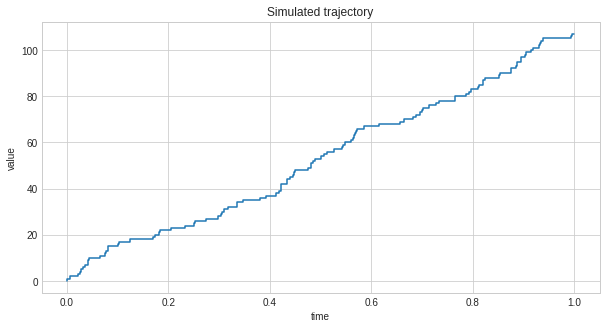

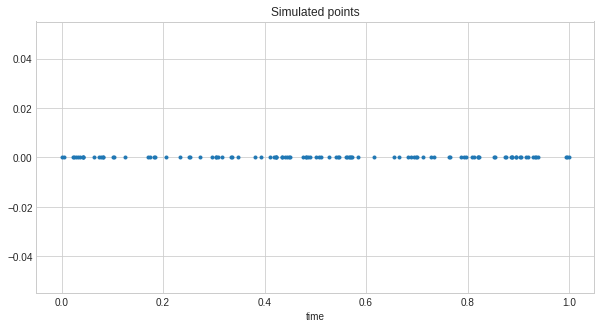

<Figure size 720x360 with 0 Axes>

In [5]:
generator = LewisShedler(lam, 1)
obs = generator.generate()
generator.visualize()

In [6]:
landwerber = Landweber(kernel, 0, 1, 500, obs, sample_size, 'rectangle', relaxation=0.05, max_iter=200)

Calculating operator approximation...
approximate ran in 0.020422935485839844 s
__premultiplication ran in 0.0015537738800048828 s
Estimating q function...
estimate_q ran in 0.004057645797729492 s
Estimating noise level...
Estimated noise level: 0.008700000000000001
estimate_delta ran in 0.0018324851989746094 s


In [7]:
landwerber.observations = generator.generate()
landwerber.refresh()
landwerber.observations

Estimating q function...
estimate_q ran in 0.004801034927368164 s
Estimating noise level...
Estimated noise level: 0.010900000000000002
estimate_delta ran in 0.002588987350463867 s


array([0.        , 0.0032526 , 0.00680919, 0.02623847, 0.02646303,
       0.03376236, 0.03932532, 0.04038424, 0.06743504, 0.08288324,
       0.08590605, 0.09424115, 0.09973069, 0.10551543, 0.10813542,
       0.12546693, 0.13403178, 0.17304121, 0.17470491, 0.18459135,
       0.19476041, 0.21074052, 0.22362237, 0.22525456, 0.24133506,
       0.24814065, 0.25598593, 0.27604792, 0.27632808, 0.27833429,
       0.29451204, 0.29667642, 0.2973253 , 0.2978736 , 0.35002256,
       0.37225223, 0.38444452, 0.38517656, 0.38841555, 0.38972916,
       0.39289534, 0.39768546, 0.4171897 , 0.41887933, 0.42120332,
       0.42440612, 0.43559716, 0.43607794, 0.44148114, 0.4455016 ,
       0.45227919, 0.45294178, 0.45610319, 0.46155491, 0.47122203,
       0.47243734, 0.48471499, 0.48755125, 0.49388342, 0.49743299,
       0.50100172, 0.50591155, 0.51902637, 0.52050312, 0.53050734,
       0.56032937, 0.56584743, 0.5682718 , 0.5760009 , 0.58309943,
       0.59741307, 0.59872073, 0.60221046, 0.61521958, 0.61692

In [8]:
landwerber.q_estimator

array([1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09,
       1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.09, 1.

In [9]:
landwerber.delta

0.010900000000000002

In [10]:
landwerber.K

array([[0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
       ...,
       [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002]])

In [11]:
landwerber.estimate()

Iteration: 1
__iteration ran in 0.00013875961303710938 s
Iteration: 2
__iteration ran in 4.649162292480469e-05 s
Iteration: 3
__iteration ran in 3.62396240234375e-05 s
Iteration: 4
__iteration ran in 3.743171691894531e-05 s
Iteration: 5
__iteration ran in 3.4809112548828125e-05 s
Iteration: 6
__iteration ran in 3.62396240234375e-05 s
Iteration: 7
__iteration ran in 3.62396240234375e-05 s
Iteration: 8
__iteration ran in 4.076957702636719e-05 s
Iteration: 9
__iteration ran in 3.7670135498046875e-05 s
Iteration: 10
__iteration ran in 3.647804260253906e-05 s
Iteration: 11
__iteration ran in 3.719329833984375e-05 s
Iteration: 12
__iteration ran in 3.552436828613281e-05 s
Iteration: 13
__iteration ran in 3.743171691894531e-05 s
Iteration: 14
__iteration ran in 3.62396240234375e-05 s
Iteration: 15
__iteration ran in 8.0108642578125e-05 s
Iteration: 16
__iteration ran in 6.031990051269531e-05 s
Iteration: 17
__iteration ran in 4.887580871582031e-05 s
Iteration: 18
__iteration ran in 4.79221343

In [12]:
landwerber.solution

array([0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161012,
       0.98161012, 0.98161012, 0.98161012, 0.98161012, 0.98161

In [14]:
landwerber.L2norm(landwerber.solution, np.repeat([1], landwerber.solution.shape[0]), sqrt=True)

0.01838988011593079